In [1]:
import pandas as pd 

In [2]:
madhu = pd.read_excel(r"C:\Users\XNovaQ.9\Downloads\archive (8)\Maths.csv")
madhu

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9
395,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6


In [3]:
# madhu.isnull().sum()
# madhu.info()
madhu.describe

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   
395     GP   F   18       U     GT3       A     4     4   at_home   teacher   
396     MS   M   19       R     GT3       T     1     1     other  services   

     ... famrel f

In [5]:
df_encoded = pd.get_dummies(madhu, drop_first=True)
df_encoded

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,21,1,1,1,1,3,5,5,3,3,...,False,True,False,False,False,False,False,True,False,False
393,18,3,2,3,1,0,4,4,1,3,...,True,False,False,False,False,False,False,True,True,False
394,19,1,1,1,1,0,3,2,3,3,...,False,False,False,False,False,False,True,True,True,False
395,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False


In [6]:
from sklearn.preprocessing import StandardScaler
X = df_encoded.drop('G3', axis=1)  # features
y = df_encoded['G3']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

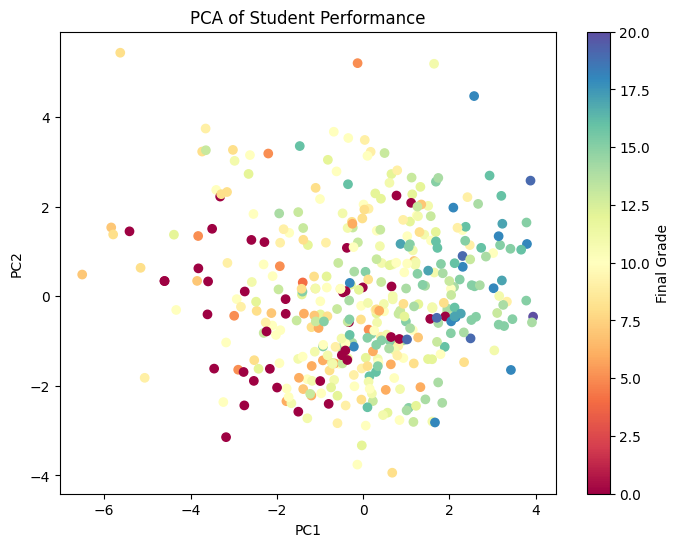

In [8]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='Spectral')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Student Performance')
plt.colorbar(label='Final Grade')
plt.show()
 